<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Clase 10</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Interpolación de Lagrange y Spline
    </p>
</div>

##### 🔹 **Interpolación Lineal**
En la interpolación lineal, se asume que la relación entre los puntos conocidos es lineal. Es el método más sencillo de interpolación, donde se estima el valor desconocido sobre la línea recta que conecta dos puntos conocidos.

La interpolación lineal es una función a trozos continua, pero tiene discontinuidades en su derivada. A menudo deseamos una interpolación más suave, es decir, que tenga una o más derivadas continuas, como por ejemplo la **interpolación de Lagrange** o la **interpolación Spline**.

##### 🔹 **Interpolación de Lagrange**

La interpolación de Lagrange utiliza un único polinomio que pasa exactamente por todos los puntos conocidos. Se construye una combinación lineal de polinomios base.

Aunque es útil para conjuntos pequeños de datos, sufre de oscilaciones indeseadas cuando se usan muchos puntos o los puntos están desigualmente distribuidos. Aun así, es una técnica fundamental para entender la teoría de la interpolación polinómica.

##### 🔹 **Interpolación Spline**

Un spline cúbico es una función cúbica a trozos que tiene dos derivadas continuas en todas partes. Esto produce una curva suave que pasa por todos los puntos, evitando los saltos o esquinas que aparecen en la interpolación lineal y también las oscilaciones indeseadas que pueden surgir en la interpolación de Lagrange cuando se utilizan muchos puntos.

Por ello, los splines son especialmente útiles cuando se requiere una interpolación suave, estable y precisa en un amplio rango de datos.

<p align="center">
  <img src="interpolation_comparison.png" style="max-width: 90%; height: auto;">
</p>


<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

### **Interpolación polinómica de Lagrange**

La interpolación polinómica de Lagrange encuentra un único polinomio que pasa por todos los puntos de datos $(x_i, y_i)$. Este polinomio se denomina polinomio de Lagrange $L(x)$, y como función de interpolación, debe tener la propiedad $L(x_i) = y_i$ para cada punto del conjunto de datos. Para calcular los polinomios de Lagrange, resulta útil escribirlos como una combinación lineal de polinomios de base de Lagrange $P_i(x)$, donde 

$$ L(x) = \sum_{i=1}^{n} y_i P_i(x) = y_1 P_1(x) + y_2 P_2(x) + y_3 P_3(x) + \cdots + y_n P_n(x)$$

y

$$ P_i(x) = \prod_{j=1, j \neq i}^{n} \frac{x - x_j}{x_i - x_j} = \frac{x-x_1}{x_i - x_1} \cdot \frac{x - x_2}{x_i - x_2} \cdot \frac{x - x_3}{x_i - x_3} \cdots \frac{x - x_n}{x_i - x_n}$$

Por lo tanto, para calcular $L(x)$ primero es necesario calcular cada $P_i(x)$.

</div>

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">


**Primer ejemplo:** determine a mano (y con calculadora si es requerido), el polinomio de Lagrange que se construye con los datos

$$(x_1, y_1) = (-1, 1) ~~,~~ (x_2, y_2) = (0, 3)~~,~~ (x_3, y_3) = (1, 0)$$

*Escriba la ecuación del polinomio aquí:* 

$$\boxed{ L(x) = ~?? }$$

</div>

Tras el cálculo, grafiquemos el polinomio:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.array([-1,0,1])
y_vals = np.array([1,3,0])

def L(x):
    return ?? # defina la salida

x = np.linspace(-1,1,100)

plt.plot(x, L(x), color="C2", ls="--")
plt.plot(x_vals,y_vals, "o", color="C0")
plt.grid(ls="--")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 1:** Implemente una rutina para calcular el polinomio de Lagrange de forma general

</div>

In [ ]:
def P_Lagrange(??):

    # su código acá

    return ??

L_propia = P_Lagrange(??)

plt.plot(x, L_propia, ls="--", color="C2", zorder=1)
plt.scatter(x_vals, y_vals, color="C0", zorder=2)
plt.grid(ls="--")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 2:** Utilice su función para determinar el polinomio de Lagrange de un conjunto de datos mas grande definido en la celda siguiente:

</div>


In [ ]:
x_vals = np.arange(start=0, step=2, stop=21)
y_vals = np.random.uniform(low=-50, high=50, size=len(x_vals))

x = np.linspace(start=x_vals[0], stop=x_vals[-1], num=200)
y = P_Lagrange(??)

plt.plot(x, y, ls="--", color="C2", zorder=1, label=f"polinomio de grado {len(x_vals) - 1}")
plt.scatter(x_vals, y_vals)
plt.grid(ls="--")
plt.legend()

plt.show()


A medida que aumentamos el número de puntos, el polinomio aumenta su grado, por lo que tiende a presentar oscilaciones bruscas entre puntos. Si disponemos de $N$ puntos para crear el polinomio, su grado será $N−1$, lo que puede llevar a un comportamiento inestable.

En cambio, el método de interpolación spline evita estas oscilaciones bruscas dividiendo el intervalo en subintervalos y ajustando un polinomio de bajo grado (por ejemplo, cúbico) en cada uno de ellos, asegurando que las transiciones entre tramos sean suaves. Esto permite una interpolación precisa y estable, incluso con muchos puntos.

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">


### **Interpolación Spline Cúbico (Cubic Spline Interpolation)**

La interpolación spline cúbica utiliza un conjunto de funciones polinómicas de tercer grado (cúbicas), definidas por tramos, para unir de forma suave un conjunto de puntos. En particular, entre cada par de puntos consecutivos $(x_i, y_i)$ y $(x_{i+1}, y_{i+1})$, se define un polinomio cúbico de la forma:

$$
S_i(x) = a_ix^3 + b_ix^2 + c_ix + d_i \quad \text{para} \quad x_i \leq x \leq x_{i+1}, \quad i = 1, 2, \dots, n - 1
$$

<p align="center">
  <img src="spline.png" style="max-width: 50%; height: auto;">
</p>

Para construir la función spline completa, se deben determinar los coeficientes $a_i$, $b_i$, $c_i$, $d_i$ de cada uno de los $n - 1$ polinomios cúbicos definidos entre los $n$ puntos de datos conocidos. Esto da lugar a un total de $4(n - 1)$ incógnitas, por lo que se requieren igualmente $4(n - 1)$ ecuaciones independientes para resolver el sistema completo.

Estas ecuaciones se obtienen aplicando las siguientes condiciones:

**1. Coincidencia con los datos originales.** Cada polinomio debe pasar exactamente por sus dos extremos:

$$
S_i(x_i) = y_i \quad , \quad S_i(x_{i+1}) = y_{i+1} \quad \text{para} \quad i = 1, 2, \dots, n - 1
$$

Esto proporciona $2(n - 1)$ ecuaciones.

**2. Suavidad en los puntos intermedios.** Se requiere que las primeras y segundas derivadas sean continuas en los puntos intermedios $x_2, x_3, \dots, x_{n - 1}$:

$$
S'_i(x_{i+1}) = S'_{i+1}(x_{i+1}) \quad , \quad S''_i(x_{i+1}) = S''_{i+1}(x_{i+1}) \quad \text{para} \quad i = 1, 2, \dots, n - 2
$$

Esto añade $2(n - 2)$ ecuaciones más.

**3. Condiciones de contorno (boundary conditions).** Con las condiciones de los apartados 1 y 2, se obtienen $2(n - 1) + 2(n - 2) = 4n - 6$ ecuaciones. Dado que el número total de incógnitas es $4(n - 1) = 4n - 4$, faltan dos ecuaciones adicionales para cerrar el sistema. Estas se obtienen imponiendo condiciones en los extremos del intervalo. Una opción común es asumir que la segunda derivada es cero en los extremos, lo que da lugar al llamado **spline natural**:

$$
S''_1(x_1) = 0 \quad , \quad S''_{n - 1}(x_n) = 0
$$

Con estas condiciones, se completa un sistema de $4(n - 1)$ ecuaciones que permite resolver todos los coeficientes de los polinomios.

En Python, se puede usar la clase `CubicSpline` del módulo `scipy.interpolate` para implementar este tipo de interpolación. Para aplicar un spline natural, se debe especificar el argumento `bc_type="natural"` al crear el objeto. Consulte la documentación de SciPy para utilizar esta clase:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">


**Ejemplo básico:**  
Determine algebráicamente (utilizando lápiz y papel) los dos polinomios spline cúbicos $S_1(x)$ y $S_2(x)$ que interpolan el siguiente conjunto de tres puntos:

$$
(x_1, y_1) = (0, 0), \quad (x_2, y_2) = (1, 1), \quad (x_3, y_3) = (2, 0)
$$

Dado que hay $n = 3$ puntos, el número de tramos es $ n - 1 = 2 $, por lo que se deben calcular dos polinomios cúbicos: uno entre $ x_1 $ y $ x_2 $, y otro entre $ x_2 $ y $ x_3 $.

**Solución:**

$$ \boxed{ S_1(x) = -\frac{1}{2} x^3  + \frac{3}{2} x ~\text{para } x \in [0, 1] } $$

$$ \boxed{ S_2(x) = \frac{1}{2} x^3 -3x^2  + \frac{9}{2} x - 1 ~\text{para } x \in [1, 2] } $$

</div>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de los polinomios spline
def S1(x):
    return -0.5 * x**3 + 1.5 * x

def S2(x):
    return 0.5 * x**3 - 3*x**2 + 4.5 * x - 1

# Derivada primera de los polinomios
def dS1(x):
    return ??

def dS2(x):
    return ??

# Derivada segunda de los polinomios
def d2S1(x):
    return ??

def d2S2(x):
    return ??

# Función spline por tramos
def S(x):
    return np.where(x <= 1, S1(x), S2(x))

# Derivadas por tramos
def dS(x):
    return np.where(x <= 1, dS1(x), dS2(x))

def d2S(x):
    return np.where(x <= 1, d2S1(x), d2S2(x))

# Datos
x_vals = np.array([0, 1, 2])
y_vals = np.array([0, 1, 0])
x = np.linspace(0, 2, 200)

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# Gráfico 1: Función Spline
axs[0].plot(x[x <= 1], S1(x[x <= 1]), color="C0", label=r"$S_1(x)$")
axs[0].plot(x[x > 1], S2(x[x > 1]), color="C1", label=r"$S_2(x)$")
axs[0].scatter(x_vals, y_vals, color="black", zorder=10, label="Puntos $(x_i, y_i)$", edgecolors='white', s=80)
axs[0].set_title("Spline cúbico natural", fontsize=14)
axs[0].set_xlabel("x")
axs[0].set_ylabel("S(x)")
axs[0].grid(True, linestyle="--", alpha=0.5)
axs[0].legend()

# Gráfico 2: Primera derivada de la función
axs[1].plot(x[x <= 1], dS1(x[x <= 1]), color="C0", label=r"$S_1'(x)$")
axs[1].plot(x[x > 1], dS2(x[x > 1]), color="C1", label=r"$S_2'(x)$")
axs[1].set_title("Primera derivada del Spline", fontsize=14)
axs[1].set_xlabel("x")
axs[1].set_ylabel("S'(x)")
axs[1].grid(True, linestyle="--", alpha=0.5)
axs[1].legend()

# Gráfico 3: Segunda derivada de la función
axs[2].plot(x[x <= 1], d2S1(x[x <= 1]), color="C0", label=r"$S_1''(x)$")
axs[2].plot(x[x > 1], d2S2(x[x > 1]), color="C1", label=r"$S_2''(x)$")
axs[2].set_title("Segunda derivada del Spline", fontsize=14)
axs[2].set_xlabel("x")
axs[2].set_ylabel("S''(x)")
axs[2].grid(True, linestyle="--", alpha=0.5)
axs[2].legend()

# Ajustar la presentación
plt.tight_layout()
plt.show()


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio:** Utilice `CubicSpline` y `lagrange` de `scipy.interpolate` para interpolar la función $f(x) = e^{-x} \sin(3x)$ muestrada en el rango $x \in [0, 4]$, con incrementos de 0.5. Compare utilizando gráficos.

</div>

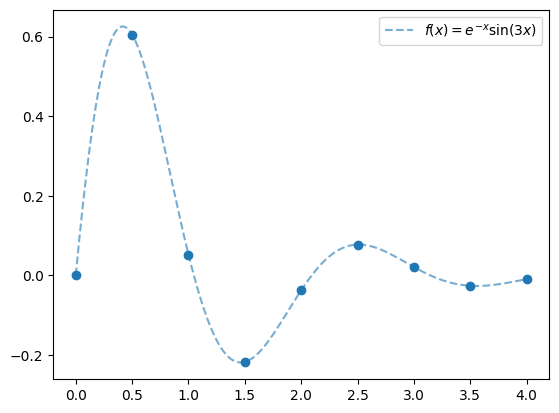

In [88]:
def f(x):
    return np.exp(-x)*np.sin(3*x) 

x_vals = np.arange(0, 4.5, 0.5)
y_vals = f(x_vals)

x = np.arange(0, 4.0, 0.01)
y = f(x)

plt.plot(x, y, label=r"$f(x)=e^{-x} \sin(3x)$", ls="--", alpha=0.6)
plt.scatter(x_vals, y_vals)
plt.legend()
plt.show()

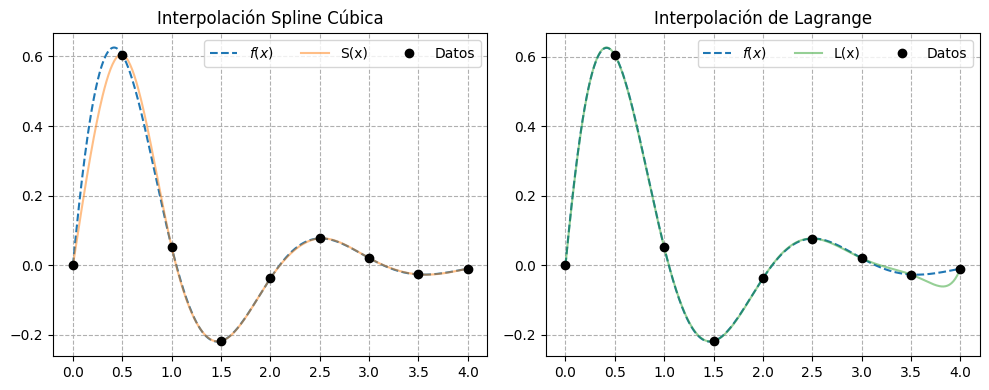

In [ ]:
from scipy.interpolate import CubicSpline, lagrange

# Datos
x_vals = np.arange(0, 4.5, 0.5)
y_vals = np.exp(-x_vals) * np.sin(3 * x_vals)
x = np.arange(0, 4.0, 0.01)

# Interpolación cúbica
#...

# Interpolación de Lagrange
#...

# Crear subplots horizontales
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Primer gráfico: Interpolación cúbica
#...

# Segundo gráfico: Interpolación de Lagrange
#...

# Ajustar el diseño
plt.tight_layout()
plt.show()


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio:** Compare la interpolación de Lagrange y la interpolación cúbica considerando los datos de la siguiente celda.

</div>

In [ ]:
from scipy.interpolate import CubicSpline, lagrange

x_vals = np.array([0, 3, 8, 14, 21, 30, 34, 40, 50, 55])
y_vals = np.array([0, 2, 9, 3, -5, -9, 0, 3, 10, 5])

x = np.linspace(start=x_vals.min(), stop=x_vals.max(), num=200, endpoint=True)

# código para comparar
# ...



<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:** ¿Qué aprendimos?

En esta clase exploramos dos métodos fundamentales de interpolación:

- **Interpolación de Lagrange:** construye un único polinomio de grado elevado que pasa exactamente por todos los puntos dados. Analizamos su simplicidad teórica pero también sus desventajas, como la oscilación en los extremos cuando se usan muchos puntos.

- **Interpolación por Splines cúbicos:** divide el intervalo en tramos y ajusta un polinomio cúbico en cada uno, garantizando suavidad (continuidad de la función y sus derivadas primera y segunda). Implementamos manualmente un ejemplo simple y visualizamos cómo se combinan los tramos del spline para formar una curva suave y estable.

También discutimos gráficamente cómo se comportan estas técnicas y analizamos sus derivadas, lo que es clave en aplicaciones físicas y de ingeniería.

Con estas herramientas, ahora podemos generar funciones suaves y continuas a partir de datos discretos, lo cual es esencial en procesamiento de señales, gráficos computacionales, análisis de datos y simulaciones numéricas.


**Próxima clase:** Métodos de Integración Numérica

Nos enfocaremos en cómo aproximar el valor de integrales definidas cuando la función no tiene una antiderivada conocida o cuando solo disponemos de datos discretos. Veremos métodos como el de Riemann, Trapecio y Simpson.

</div>

<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional III para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>